# Introductory Statistics in Python - Session 1
The workshop addresses the fundamentals of statistics management with Python. The objective is to give the student the fundamental knowledge to perform main statistical tasks in Python. The Python codes will be written and executed in Jupyter Notebook. Students will be provided with the necessary databases to be able to run the codes.

In the first session, we will cover descriptive statistics, providing tools to calculate measures of central tendency, spread, and summary statistics. Following that, we'll delve into probability calculations and sampling techniques, including both with and without replacement. Additionally, we'll introduce discrete and continuous probability distributions. Finally, we'll discuss the Central Limit Theorem and its practical applications.

### Lecturer: Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

- <a href='#t1'>1. Descriptive Statistics in Python</a>
     - <a href='#1.1.'>1.1 Measures of central tendency</a>
        - <a href='#1.1.1'>Mean</a>
        - <a href='#1.1.2'>Weighted Mean</a>
        - <a href='#1.1.3'>Harmonic Mean</a> 
        - <a href='#1.1.4'>Geometric Mean</a>
        - <a href='#1.1.5'>Median</a>
        - <a href='#1.1.6'>Mode</a> 
     - <a href='#1.2.'>1.2. Measures of spread</a>
     - <a href='#1.3.'>1.3. Summary of Descriptive Statistics </a>
- <a href='#t2'>2. Probabilities and distributions </a>
     - <a href='#2.1.'> 2.1 Calculating probabilities </a>
     - <a href='#2.2.'> 2.2 Sampling </a>
     - <a href='#2.3.'> 2.3 Discrete probability distributions </a>
         - <a href='#2.3.1'> Discrete Empirical distribution </a> 
         - <a href='#2.3.2'> Discrete Uniform distribution </a>  
     - <a href='#2.4.'>2.4. Continious probability distributions </a>
         - <a href='#2.4.1'> Continuous Uniform distribution </a>
         - <a href='#2.4.2'> Binomial distribution </a> 
         - <a href='#2.4.3'> Normal distribution </a> 
- <a href='#t3'>3. Central Limit Theorem and more probability distributions</a> 
     - <a href='#3.1.'>3.1. CLT</a>
- <a href='#t4'>4. Graficar estadísticas y sintetizar la información</a>
     - <a href='#4.1.'>4.1. Graficar boxplots (gráficos de caja)</a>
- <a href='#t5'>5. Descomponer una serie de tiempo</a>

#  <a id='t1'> 1. Descriptive Statistics in Python</a>
In this workshop, we embark on a journey into the world of statistics using the versatile programming language, Python. Statistics plays a pivotal role in extracting meaningful insights from data, and Python provides a powerful platform to perform statistical analysis efficiently. Get ready to explore the foundations of statistical analysis, learn essential Python libraries, and gain the skills to make informed decisions based on data. For this course we will mainly be using numpy and pandas libraries


## <a id='1.1.'> 1.1 Measures of central tendency </a> 
In this section, we delve into the fundamental concept of "Measures of Central Tendency." At the heart of statistical analysis, these measures provide a summary of the central or average value within a dataset, offering crucial insights into its central tendencies. We'll explore three primary measures: the mean, which represents the arithmetic average; the median, which identifies the middle value; and the mode, representing the most frequently occurring value. We will first use numpy arrays to use this functions. Then, we will be using a database containing macroeconomic data from Peru. 

In [1]:
>>> import math
>>> import statistics
>>> import numpy as np
>>> from scipy import stats
>>> import pandas as pd
>>> import matplotlib.pyplot as plt

In [2]:
# We create an list and the same list with a nan value
>>> x = [8.0, 1, 2.5, 4, 28.0]
>>> x_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]

In [3]:
# Alternatively
>>> x_nan = [8.0, 1, 2.5, np.nan, 4, 28.0]

In [4]:
# We create their array and series versions
>>> y, y_nan = np.array(x), np.array(x_nan)
>>> z, z_nan = pd.Series(x), pd.Series(x_nan)

### <a id='1.1.1'> Mean </a> 
We can calculate the mean dividing the sum againts the length. This does not work if we include the nan value.
The ```mean()``` and ```fmean()``` funtions return the same value in a more elegant way. ```fmean()``` always return a float number and is faster than ```mean()```.

In [5]:
# We can calculate the mean dividing the sum againts the length
mean = sum(x) / len(x)
print(mean)

8.7


In [6]:
# This does not work if we include the nan value
mean = sum(x_nan) / len(x_nan)
print(mean)

nan


In [7]:
# We can apply Python built-in functions of the statistics package
mean = statistics.mean(x)
print(mean)
mean = statistics.fmean(x)
print(mean)

8.7
8.7


In [8]:
# But they do not work wit nan values
mean = statistics.mean(x_nan)
print(mean)
mean = statistics.fmean(x_nan)
print(mean)

nan
nan


 Numpy also offers us the ```np.mean()``` and ```np.nanmean()``` functions, as well as the ```.mean()``` method. 

In [9]:
# We can also use the numpy function on lists
mean = np.mean(x)
print(mean)
mean = np.mean(x_nan)
print(mean)

8.7
nan


In [10]:
# We can also use numpy method on arrays
mean = y.mean()
print(mean)
mean = y_nan.mean()
print(mean)

8.7
nan


In [11]:
# We can also use numpy method on series. The pandas method authomatically ignores nan values
mean = z.mean()
print(mean)
mean = z_nan.mean()
print(mean)

8.7
8.7


In [12]:
# We can do the same for lists and arrays for nanmean()
print(np.nanmean(y_nan))
print(np.nanmean(x_nan))

8.7
8.7


### <a id='1.1.2'> Weighted mean </a> 
The weighted mean, or weighted average, is an extension of the regular mean in statistics. It allows us to give different weights to individual data points, indicating their varying impact on the overall result. You can calculate the weighted mean with built-in Python functions by combining ```sum()``` with either ```range()``` or ```zip()```. 

In [13]:
# We define the values and their weights
>>> x = [8.0, 1, 2.5, 4, 28.0]
>>> w = [0.1, 0.2, 0.3, 0.25, 0.15]
# We calculate the weighted mean
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

6.95


In [14]:
# Alternatively
wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95


You also can use ```np.average()``` to get the weighted mean of NumPy arrays or pandas Series

In [15]:
# We calculate the weighted mean of an array
wmean = np.average(y, weights=w)
print(wmean)

6.95


In [16]:
# We calculate the weighted mean of a pandas series
wmean = np.average(z, weights=w)
print(wmean)

6.95


An alternative approach involves utilizing the element-wise product of w * y and then applying ```np.sum()``` or ```.sum()```(w * y).sum() / w.sum().

In [17]:
w = np.array(w)
(w * y).sum() / w.sum()

6.95

It doesn't work when the data contains nan values

In [18]:
w = np.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
wmean = np.average(y_nan, weights=w)
print(wmean)
wmean = np.average(z_nan, weights=w)
print(wmean)

nan
nan


### <a id='1.1.3'> Harmonic Mean </a> 
The harmonic mean, unlike the weighted mean, highlights the importance of smaller values in a dataset. The harmonic mean accounts for reciprocal values, making it particularly useful in scenarios where rates or ratios play a crucial role. It formula is given by
$$
\frac{n}{ \sum_i(1/x_i)}, \text{where } i = 1, 2, ..., n
$$

In Python, you can easily calculate the harmonic mean using functions like ```scipy.stats.hmean()``` or ```statistics.harmonic_mean(x)```

In [19]:
x = [8.0, 1, 2.5, 4, 28.0]
hmean = len(x) / sum(1 / item for item in x)
print(hmean)

2.7613412228796843


In [20]:
# We can use scipy
hmean = stats.hmean(x)
print(hmean)

2.7613412228796843


In [21]:
# Or we can use the built-in statistics package
hmean = statistics.harmonic_mean(x)
print(hmean)

2.7613412228796843


In [22]:
# If there is a nan value it returns nan
statistics.harmonic_mean(x_nan)

nan

In [23]:
# If there is a 0 it returns 0
statistics.harmonic_mean([1, 0, 2])

0

In [24]:
# If there a negative number, it returns an error
#statistics.harmonic_mean([1, 2, -2]) 

In [25]:
# We can apply it to arrays and pandas series
print(stats.hmean(y))
print(stats.hmean(z))

2.7613412228796843
2.7613412228796843


###  <a id='1.1.4'> Geometric Mean </a>  
The geometric mean is expressed mathematically as the $n-th$ root of the product of all $n$ elements $x_i$ in a dataset $x$:

$$\sqrt[n]{\prod_{i=1}^{n} x_i}, \text{where } (i = 1, 2, \ldots, n)$$

You can incorporate the geometric mean using pure Python in the following manner

In [26]:
gmean = 1
for item in x:
     gmean *= item

gmean **= 1 / len(x)
print(gmean)

4.677885674856041


Additionally, we can use ```statistics.geometric_mean()```

In [27]:
# We can also use the statistics built-in function
gmean = statistics.geometric_mean(x)
gmean

4.67788567485604

In [28]:
# Doesn't work with nan values
gmean = statistics.geometric_mean(x_nan)
gmean

nan

You can also get the geometric mean using ```scipy.stats.gmean()``` in arrays and pandas series

In [29]:
print(stats.gmean(y))

print(stats.gmean(y_nan))

4.67788567485604
nan


In [30]:
print(stats.gmean(z))

print(stats.gmean(z_nan))

4.67788567485604
nan


###  <a id='1.1.5'> Median </a>   
The median of a sample corresponds to the middle element of the sorted dataset, regardless of whether the sorting is done in ascending or descending order. For an odd number of elements $((n))$, the median is the value at the middle position, specifically at $0.5((n + 1))$. In the case of an even number of elements, the median is determined by taking the average of the two middle values located at positions $0.5(n)$ and $0.5(n + 1)$.

In [31]:
x = [8.0, 1, 2.5, 4, 28.0]
x_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
y, y_nan = np.array(x), np.array(x_nan)
z, z_nan = pd.Series(x), pd.Series(x_nan)

This function ```calculate_median()``` takes a dataset as input, sorts it, and computes the median, considering both odd and even-length datasets.

In [32]:
def calculate_median(data):
    n = len(data)
    sorted_data = sorted(data)

    if n % 2:
        median_value = sorted_data[round(0.5 * (n - 1))]
    else:
        index = round(0.5 * n)
        median_value = 0.5 * (sorted_data[index - 1] + sorted_data[index])

    return median_value

median_ = calculate_median(x)
print("Median:", median_)

Median: 4


We can also use the ```statistics.median()``` function. The sorted form of x, [1, 2.5, 4, 8.0, 28.0], places 4 at the middle position. Removing the last item (28.0) from x, the sorted version becomes [1, 2.5, 4, 8.0]. In this case, with two middle elements, 2.5 and 4, their average is 3.25.

In [33]:
median_ = statistics.median(x)
median_

4

In [34]:
median_ = statistics.median(x[:-1])
median_

3.25

Additionally, we can use ```statistics.median_low()``` and ```statistics.median_high()```. When the element count is odd, these functions operate similarly to median(), as there is a lone middle value. However, if the count is even, ```median_low()``` yields the lower middle value, while ```median_high()``` provides the higher middle value.

In [35]:
# median_low will return 2.5
median_ = statistics.median_low(x[:-1])
median_

2.5

In [36]:
# median_high will return 4
median_ = statistics.median_high(x[:-1])
median_

4

This functions work well with nan, unlike most other functions

In [37]:
print(statistics.median(x_nan))
print(statistics.median_low(x_nan))
print(statistics.median_high(x_nan))

6.0
4
8.0


We can use Numpy similarly with ```np.median()```, giving us the same results for lists, arrays and series.

In [38]:
median_ = np.median(y)
print(median_)

median_ = np.median(z[:-1])
print(median_)

4.0
3.25


In case we want to include nan values, then we use ```np.nanmedian()```. 

In [39]:
median_ = np.nanmedian(y_nan)
print(median_)

median_ = np.nanmedian(z_nan[:-1])
print(median_)

4.0
3.25


Finally, we have the pandas Series method ```.median()``` that ignores nan values by default

In [40]:
print(z.median())
print(z_nan.median())

4.0
4.0


### <a id='1.1.6'> Mode </a>  
The mode in a sample refers to the value that appears most frequently in the dataset. If there isn't a singular value with the highest frequency, the dataset is considered multimodal as it contains multiple modal values. We can easily obtain the mode this way:

In [41]:
u = [6, 3, 6, 9, 12, 9, 6]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

6

We can also obtain the mode with ```statistics.mode()``` and ```statistics.multimode()```

In [42]:
mode_ = statistics.mode(u)
mode_

6

In [43]:
u = [6, 3, 6, 9, 12, 9, 6, 9]
mode_ = statistics.multimode(u)
mode_

[6, 9]

In [44]:
v = [11, 13, 11, 13, 17, 13, 11]
mode_ = statistics.multimode(v)
mode_

[11, 13]

Both functions handle nan values as regular values and can return nan as the modal value

In [45]:
statistics.multimode([2, math.nan, 2, math.nan, 5])

[2, nan]

You can also get the mode with ```scipy.stats.mode()```

In [46]:
u = np.array(u)
mode_ = stats.mode(u)
mode_

ModeResult(mode=6, count=3)

We can get the the mode and its number of occurrences as NumPy arrays with dot notation


In [47]:
print(mode_.mode)
print(mode_.count)

6
3


Pandas Series have the method ```.mode()``` that handles multimodal values well and ignores nan values by default

In [48]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    6
1    9
dtype: int32
0    11
1    13
dtype: int64
0    2.0
dtype: float64


### Now let's work with a dataframe

In [49]:
# We read and transform the database
>>> peru = pd.read_excel('databases/peru.xlsx', parse_dates=['Year'])
>>> peru = peru.drop(columns=['Unnamed: 0', 'Country'])
>>> peru.set_index('Year', inplace=True)

In [50]:
# We analize it
peru.head()

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
Year,,,,,,
1980-01-01,-5.175,NaN,NaN,7.326,59.145,0.43875
1981-01-01,-9.673,NaN,NaN,6.800,75.433,0.43875
1982-01-01,-9.142,NaN,NaN,6.400,64.460,0.43875
1983-01-01,-6.842,NaN,NaN,9.000,111.149,0.43875
1984-01-01,-1.381,NaN,NaN,8.900,110.209,0.43875


In [51]:
# We further analyse it with the describe() function
peru.describe()

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
count,42.000000,22.000000,22.000000,42.000000,41.000000,41.000000
mean,-3.368333,17.760636,21.070182,7.779119,315.795195,0.702226
std,3.052220,13.084920,1.740462,1.752538,1266.240395,0.171591
min,-9.673000,1.499000,18.593000,4.156000,0.192000,0.438750
25%,-5.428250,7.350000,19.901500,6.710500,2.804000,0.438750
50%,-2.966000,12.611500,20.948500,7.863500,3.759000,0.811250
75%,-1.285000,29.997250,21.466000,8.975000,73.529000,0.811250
max,3.331000,38.672000,26.862000,13.000000,7481.691000,0.811250


In [52]:
peru.count()

Current account balance                 42
General government net debt             22
General government total expenditure    22
Unemployment rate                       42
CPI                                     41
CBI                                     41
dtype: int64

In [53]:
peru.mean()

Current account balance                  -3.368333
General government net debt              17.760636
General government total expenditure     21.070182
Unemployment rate                         7.779119
CPI                                     315.795195
CBI                                       0.702226
dtype: float64

In [54]:
peru.max()

Current account balance                    3.33100
General government net debt               38.67200
General government total expenditure      26.86200
Unemployment rate                         13.00000
CPI                                     7481.69100
CBI                                        0.81125
dtype: float64

In [55]:
peru.min()

Current account balance                 -9.67300
General government net debt              1.49900
General government total expenditure    18.59300
Unemployment rate                        4.15600
CPI                                      0.19200
CBI                                      0.43875
dtype: float64

We can equally inspect it using the numpy library. We can use np.mean(), np.median() and stats.mode()

In [56]:
print(f'The mean for Current account balance is {np.mean(peru["Current account balance"])}')
print(f'The mean for General government net debt is {np.mean(peru["General government net debt"])}')
print(f'The mean for General government total expenditure is {np.mean(peru["General government total expenditure"])}')
print(f'The mean for Unemployment rate is {np.mean(peru["Unemployment rate"])}')
print(f'The mean for CPI is {np.mean(peru["CPI"])}')
print(f'The mean for CBI is {np.mean(peru["CBI"])}')

The mean for Current account balance is -3.368333333333333
The mean for General government net debt is 17.760636363636365
The mean for General government total expenditure is 21.07018181818182
The mean for Unemployment rate is 7.779119047619046
The mean for CPI is 315.7951951219512
The mean for CBI is 0.7022256097560977


In [57]:
print(f'The median for Current account balance is {np.median(peru["Current account balance"])}')
print(f'The median for General government net debt is {np.median(peru["General government net debt"])}')
print(f'The median for General government total expenditure is {np.median(peru["General government total expenditure"])}')
print(f'The median for Unemployment rate is {np.median(peru["Unemployment rate"])}')
print(f'The median for CPI is {np.median(peru["CPI"])}')
print(f'The median for CBI is {np.median(peru["CBI"])}')

The median for Current account balance is -2.966
The median for General government net debt is nan
The median for General government total expenditure is nan
The median for Unemployment rate is 7.8635
The median for CPI is nan
The median for CBI is nan


In [58]:
print(f'The mode for Current account balance is {stats.mode(peru["Current account balance"])[0]}')
print(f'The mode for General government net debt is {stats.mode(peru["General government net debt"])[0]}')
print(f'The mode for General government total expenditure is {stats.mode(peru["General government total expenditure"])[0]}')
print(f'The mode for Unemployment rate is {stats.mode(peru["Unemployment rate"])[0]}')
print(f'The mode for CPI is {stats.mode(peru["CPI"])[0]}')
print(f'The mode for CBI is {stats.mode(peru["CBI"])[0]}')

The mode for Current account balance is -9.673
The mode for General government net debt is nan
The mode for General government total expenditure is nan
The mode for Unemployment rate is 9.4
The mode for CPI is 0.192
The mode for CBI is 0.81125


What can we do about all those nans ?

In [59]:
# We can either fill them with 0s 
peru_filled = peru.fillna(0).head()
peru_filled

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
Year,,,,,,
1980-01-01,-5.175,0.0,0.0,7.326,59.145,0.43875
1981-01-01,-9.673,0.0,0.0,6.800,75.433,0.43875
1982-01-01,-9.142,0.0,0.0,6.400,64.460,0.43875
1983-01-01,-6.842,0.0,0.0,9.000,111.149,0.43875
1984-01-01,-1.381,0.0,0.0,8.900,110.209,0.43875


In [60]:
# Or drop the observations with nans
peru_dropped = peru.dropna()
peru_dropped.head()

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
Year,,,,,,
2000-01-01,-3.064,37.680,21.735,7.847,3.759,0.81125
2001-01-01,-2.351,37.060,20.934,9.246,1.975,0.81125
2002-01-01,-2.031,38.128,19.649,9.420,0.192,0.81125
2003-01-01,-1.592,38.672,20.113,9.424,2.261,0.81125
2004-01-01,0.094,34.958,19.558,9.436,3.662,0.81125


In [61]:
peru_dropped.describe()

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
count,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01
mean,-1.538429,17.664095,20.952190,8.064381,2.657238,8.112500e-01
std,2.203459,13.400022,1.690879,1.653685,1.197392,2.275280e-16
min,-4.814000,1.499000,18.593000,5.938000,0.192000,8.112500e-01
25%,-2.868000,6.912000,19.831000,6.742000,1.827000,8.112500e-01
50%,-1.975000,12.175000,20.946000,7.880000,2.804000,8.112500e-01
75%,-0.520000,31.966000,21.352000,9.246000,3.548000,8.112500e-01
max,3.331000,38.672000,26.862000,13.000000,5.788000,8.112500e-01


In [62]:
peru_filled.describe()

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000e+00
mean,-6.442600,0.0,0.0,7.685200,84.079200,4.387500e-01
std,3.358138,0.0,0.0,1.200914,24.984618,6.206335e-17
min,-9.673000,0.0,0.0,6.400000,59.145000,4.387500e-01
25%,-9.142000,0.0,0.0,6.800000,64.460000,4.387500e-01
50%,-6.842000,0.0,0.0,7.326000,75.433000,4.387500e-01
75%,-5.175000,0.0,0.0,8.900000,110.209000,4.387500e-01
max,-1.381000,0.0,0.0,9.000000,111.149000,4.387500e-01


## <a id='1.1.'> 1.2 Measures of spread </a> 
In this section, we delve into the essential tools that help us understand the variability and dispersion within a dataset. Measures such as range, variance, and standard deviation provide insights into how data points are distributed around the central tendency. By using these measures of spread, you'll gain a deeper understanding of the distribution of data, enabling you to make informed decisions and draw meaningful conclusions from your statistical analyses.

# <a href='#t2'>2. Probabilities</a>

## <a id='2.1.'> 2.1 Calculating probabilities </a> 
We analyse the deals dataframe, which shows the deals an employee made with different clients during the last year. It contains the following information
- product: product of the deal
- client: New or Current
- status:  Won or Lost
- amount: amount of the deal
- num_users: # of users of the product

Let's calculate the probability of selecting a deal for the different product types

In [63]:
>>> deals = pd.read_csv('databases/deals.csv')
>>> deals.drop(columns=['Unnamed: 0'], inplace=True)
>>> deals.head()

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17


In [64]:
# We first count the number of deals with each product
counts = deals['product'].value_counts()
counts

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64

In [65]:
# We calculate probability of picking a deal with each product
probs = counts / counts.sum()
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [66]:
# We sum the probabilities and get 1 or 100% 
round(probs.sum(), 2)

1.0

## <a id='2.2.'> 2.2 Sampling </a> 
Let's say we want to randomly pick ten deals so that we can reach out to each customer and ask if they were satisfied with the service they received. We are going to sample both with replacement and without replacement using the ```sample``` method.

In [67]:
# We set a random seed so we can repeat the experiment
np.random.seed(42)

In [68]:
sample_without_replacement = deals.sample(10, replace = False)
sample_without_replacement

,product,client,status,amount,num_users
19,Product I,Current,Won,3220.45,45
45,Product B,Current,Won,8614.12,17
140,Product B,Current,Lost,5856.18,45
30,Product C,New,Won,6151.14,66
67,Product B,Current,Won,4571.26,19
16,Product D,Current,Won,5282.57,58
119,Product B,Current,Won,1597.44,37
174,Product D,Current,Won,6377.50,12
109,Product H,Current,Won,5257.16,22
141,Product B,Current,Won,4795.64,8


In [69]:
# We set a random seed so we can repeat the experiment
np.random.seed(42)

# We sample 10 deals with replacement
sample_with_replacement = deals.sample(10, replace = True)
sample_with_replacement

,product,client,status,amount,num_users
102,Product D,New,Lost,1196.53,63
92,Product A,Current,Won,4509.96,92
14,Product B,Current,Lost,7030.54,41
106,Product H,Current,Won,4547.97,13
71,Product A,Current,Won,5945.63,55
20,Product F,Current,Lost,6849.12,19
102,Product D,New,Lost,1196.53,63
121,Product B,Current,Won,4831.73,12
74,Product D,Current,Lost,4274.80,9
87,Product C,Current,Won,3579.63,3


Given that we want the most varied number of opinions possible, in this example, it would be better to do sampling without replacement

## <a id='2.3.'> 2.3 Discrete Probability distributions </a> 
A probability distribution is a mathematical function that describes the likelihood of obtaining different possible outcomes in a random experiment or process. It provides a way to model uncertainty and randomness in various fields such as statistics, probability theory, and machine learning. Probability distributions can be discrete or continuous, depending on the nature of the random variable they describe. We will see discrete distributions. First, with an example with an empirical distribution and then, a uniform distribution of dices

### <a id='2.3.1'> Discrete Empirical distribution </a>  

In [70]:
data = {'group_id': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
        'group_size': [3, 5, 6, 2, 4, 2, 3, 2, 5, 2, 3, 7]}

data = pd.DataFrame(data)

Let's say we have 12 different groups and we want to select them randomly. Let's see the probability distribution of groups of different sizes being picked up.

First, we create a histogram of the `group_size` column to see how it is distributed. We can see most groups consist of only 2 or 3 people.

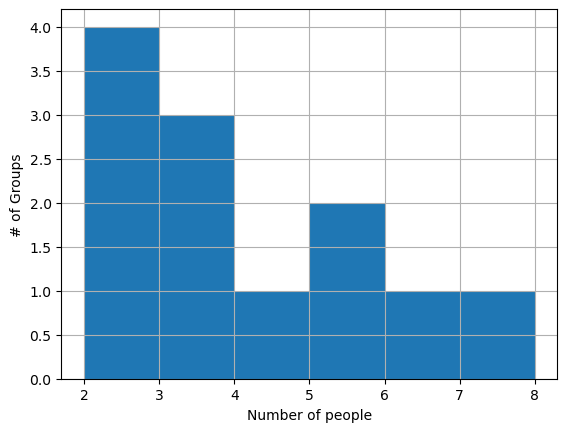

In [71]:
data['group_size'].hist(bins = [2, 3, 4, 5, 6, 7, 8])
plt.ylabel('# of Groups')
plt.xlabel('Number of people')
plt.show()

Then, we tally the occurrences of each `group_size` in `restaurant_groups`. Subsequently, we divide by the total number of rows in `restaurant_groups` to ascertain the probability associated with randomly selecting a group of each size. The results are stored in a DataFrame named `size_dist`. Following this, we reset the index of `size_dist` and proceed to rename its columns to 'group_size' and 'prob'.

In [72]:
# We create probability distribution
size_dist = data.groupby('group_size').count() / len(data)

# We reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

size_dist

,group_size,prob
0,2,0.333333
1,3,0.250000
2,4,0.083333
3,5,0.166667
4,6,0.083333
5,7,0.083333


We observe that groups with 2, 3 and 5 people are most likely to be chosen. Next, compute the expected value of the `size_distribution`, representing the anticipated group size. This involves multiplying each `group_size` by its corresponding probability (`prob`) and summing up the results.

In [73]:
# We calculate the expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(round(expected_value, 2))

3.67


Finally, we determine the probability of randomly selecting a group comprising 4 or more people by subsetting those groups Subsequently, sum the probabilities associated with choosing groups of this size or larger.

In [74]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

0.41666666666666663


### <a id='2.3.2'> Discrete Uniform distribution </a>  

In [75]:
die  = {'number': [1, 2, 3, 4, 5, 6],
        'times': [1, 1, 1, 1, 1, 1]}

die  = pd.DataFrame(die)

By plotting the histogram, we can see that each number of the dice has an equal probability of being choosen when rolling the dice

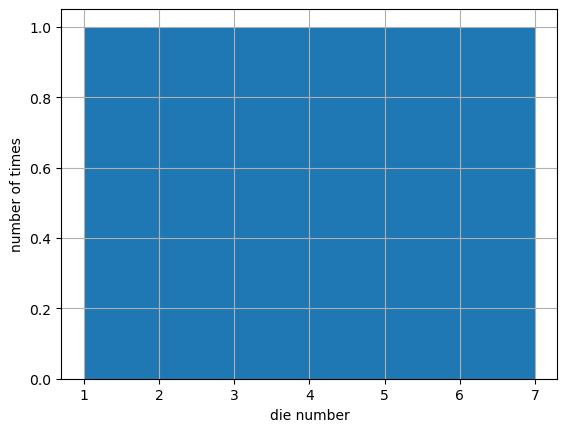

In [76]:
die['number'].hist(bins = [1, 2, 3, 4, 5, 6, 7])
plt.ylabel('number of times')
plt.xlabel('die number')
plt.show()

Each number has 1/6 or around 17% chance of being selected

In [77]:
# We create probability distribution
number_dist = die.groupby('number').count() / len(die)

# We reset index and rename columns
number_dist = number_dist.reset_index()
number_dist.columns = ['number', 'prob']

number_dist

,number,prob
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


The expected value of our die is 3.5

In [78]:
np.mean(die['number'])

3.5

We can sample with replacement to simulate 10 rolls of the die and see how the distribution changes

In [79]:
rolls_10 = die.sample(10, replace = True)
rolls_10

,number,times
4,5,1
3,4,1
2,3,1
5,6,1
4,5,1
1,2,1
3,4,1
5,6,1
5,6,1
1,2,1


We visualize the distribution and calculate the sample mean, we see that the sample mean is not the expected value, but it is close

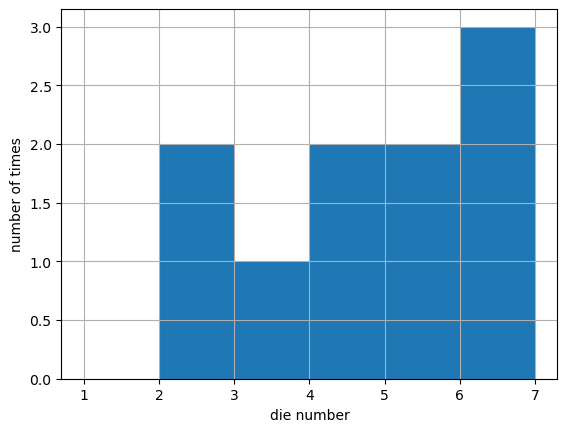

In [80]:
rolls_10['number'].hist(bins = np.linspace(1, 7, 7))
plt.ylabel('number of times')
plt.xlabel('die number')
plt.show()

In [81]:
np.mean(rolls_10['number'])

4.3

What would happen if we had a 100 rolls instead of just 10? Let's see...

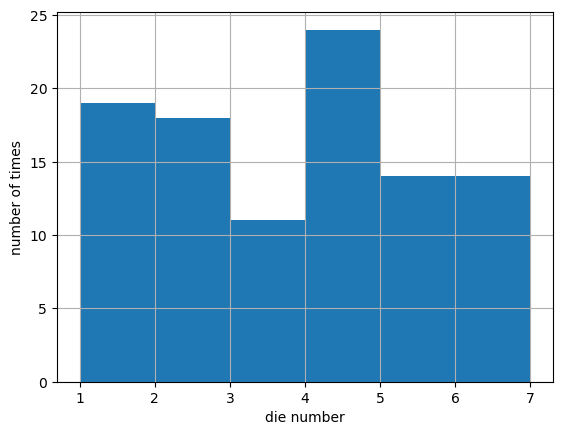

In [82]:
rolls_100 = die.sample(100, replace = True)

rolls_100['number'].hist(bins = np.linspace(1, 7, 7))
plt.ylabel('number of times')
plt.xlabel('die number')
plt.show()

The distribution would look close to a uniform distribution and the sample mean would get closer the expected value

In [83]:
np.mean(rolls_100['number'])

3.38

What about 1000 rolls?

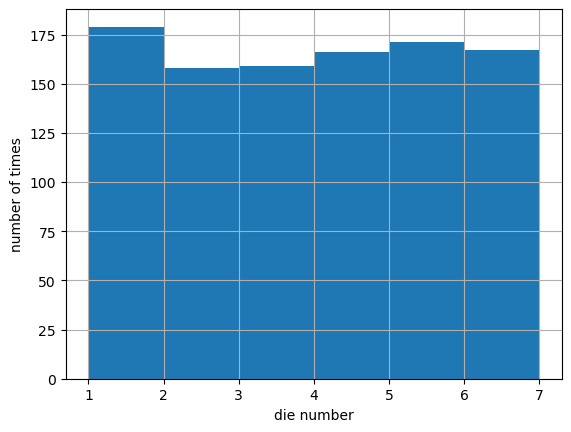

In [84]:
rolls_1000 = die.sample(1000, replace = True)

rolls_1000['number'].hist(bins = np.linspace(1, 7, 7))
plt.ylabel('number of times')
plt.xlabel('die number')
plt.show()

In [85]:
np.mean(rolls_1000['number'])

3.493

We observe that the sample mean is now even closet the expected mean, we are seeing the **Law of Large Number** in action. The **Law of Large Numbers** states that as the sample size of a random experiment increases, the average of the observed values converges to the expected (theoretical) mean, indicating that large samples provide more accurate estimations of population parameters. What do you think would happen if we would sample 10000 times?

## <a id='2.4.'> 2.4 Continuous Probability distributions </a>

Continuous Probability Distributions describe the likelihood of obtaining any specific value within a continuous range of possible outcomes. Unlike discrete distributions, they deal with infinite possibilities and are characterized by Probability Density Functions (PDFs), representing the probability density at each point. The Cumulative Distribution Function (CDF) associated with these distributions gives the probability that a random variable is less than or equal to a specific value. Common examples include the normal distribution and exponential distribution.

### <a id='2.4.1'> Continuous Uniform distribution </a> 

The Continuous Uniform Distribution represents outcomes where any value within a specified continuous range is equally likely. It is defined by two parameters: the minimum and maximum values of the range.

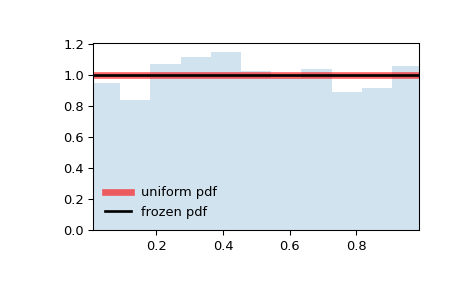

In [86]:
>>> from scipy.stats import uniform

Let's say there we are waiting in line for a bus and it has an equal probability of arriving at any moment between 12:00pm and 12:15pm. Let's calculate some probabilities using `cdf` (cummulative distribution function). 

The probability of the bus arriving at any moment during those 15 minutes will always be one, since it is the sum of all probabilities:

In [89]:
uniform.cdf(15, 0, 15)

1.0

The probability of the bus arriving during the first seven minutes:

In [88]:
uniform.cdf(7, 0, 15)

0.4666666666666667

What about the probability of waiting more than four minutes but less than seven?

In [90]:
uniform.cdf(7, 0, 15) - uniform.cdf(4, 0, 15)

0.2

Now, let's generate random values using the uniform distribution with the `rvs` function. We put as input the minimum value, the maximum value and then the size of the sample

In [92]:
uniform.rvs(0, 15, size = 15)

array([ 9.30109134,  8.00191638, 13.40838875, 11.82895817,  2.2751232 ,
        4.67583102,  3.7273371 , 11.15919439,  0.50298652,  8.54834527,
       11.43688029, 13.15148455,  5.13122623, 12.31885957,  1.65947605])

If you want our sample to be reduplicated, don't forget to add a random seed

In [93]:
np.random.seed(42)
uniform.rvs(0, 15, size = 15)

array([ 5.61810178, 14.2607146 , 10.97990913,  8.97987726,  2.34027961,
        2.33991781,  0.87125418, 12.99264219,  9.01672518, 10.62108867,
        0.30876741, 14.54864778, 12.48663961,  3.18508666,  2.72737451])

Now, another example. Your computer is in need of an update and it might restart at any moment in the following 30 minutes. Again, let's calculate some probabilities using `cdf`.

In [95]:
# What is the probability of waiting less than 5 mins ? 
prob_less_5 = uniform.cdf(5, 0, 30)
print(prob_less_5)

0.16666666666666666


In [97]:
# What is the probability of waiting more than 5 mins ? 
prob_more_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_less_5)

0.8333333333333334


In [99]:
# What is the probability of waiting more than 10 mins and less than 20 ? 
prob_more_10_less_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_more_10_less_20)

0.3333333333333333


Now we can generate 10000 samples of the waiting time. By plotting the samples in a histogram, we can easily see that it follows a continious uniform distribution

In [100]:
# We generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=10000)

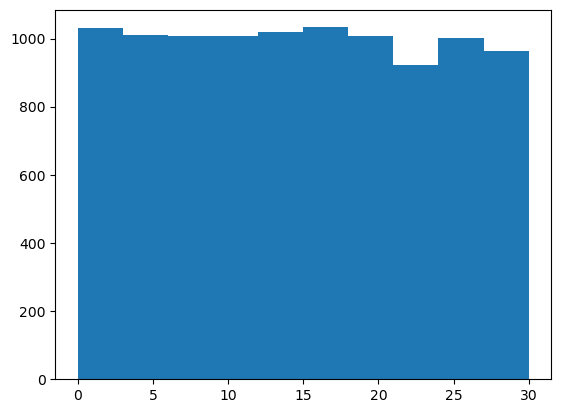

In [101]:
# We create a histogram of simulated times
plt.hist(wait_times)
plt.show()

### <a id='2.4.2'> Binomial distribution </a> 
The Binomial Distribution models the number of successes in a fixed number of independent Bernoulli trials, each with the same probability of success. It is characterized by two parameters: the number of trials and the probability of success in each trial.

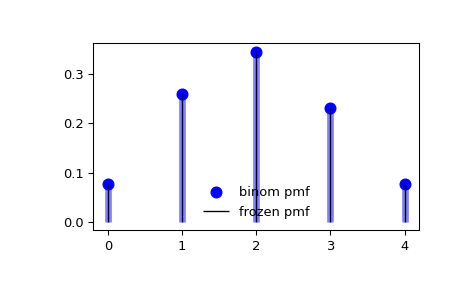

In [103]:
>>> from scipy.stats import binom

Let's simulate different coin tosses

In [111]:
# We flip 1 coin with a 50% chance of success, one time
binom.rvs(1, 0.5, size= 1)

array([1], dtype=int64)

In [109]:
# We flip 1 coin with a 50% chance of success, ten times
binom.rvs(1, 0.5, size= 10)

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

We can swap the first and last argument. The result will give us the sum of successes

In [114]:
# We flip 8 coins with a 50% chance of success, one time each coin
binom.rvs(10, 0.5, size= 1)

array([6], dtype=int64)

If we set 3 as the first argument and size to 5, then we are flipping 3 coins, 5 times each one. It returns 5 numbers, representing the number of heads between the 3 coins each flip

In [118]:
# We flip 3 coins with a 50% chance of success, ten times each coin
binom.rvs(3, 0.5, size= 10)

array([2, 1, 3, 1, 2, 1, 1, 2, 2, 1], dtype=int64)

We can also make one side heavier than the other, meaning that one outcome will be more likely than the other. Let's say that heads is heavier. Instead of 50% chance, now we have a 75% chance of getting heads. The result will have higher numbers, since it is now more likely to get a success (heads)

In [119]:
binom.rvs(3, 0.75, size= 10)

array([3, 3, 2, 3, 3, 2, 2, 2, 2, 1], dtype=int64)

We can do the opposite, making tails more likely. Instead of 50% chance, now we have a 25% chance of getting heads. The result will have lower numbers, since it is now more likely to get a failure (tails)

In [121]:
binom.rvs(3, 0.25, size= 10)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

We can see the distribution of flipping 10 coins multiple times with a 50% chance of getting heads. Most of the outcomes will be located in the middle. The expected value in the binomial distribution is $n \times p$ meaning in this case it is $10 \times 0.5 = 5$

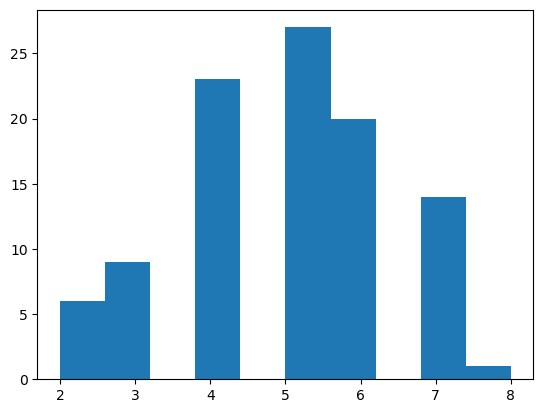

In [145]:
flips = binom.rvs(10, 0.5, size= 100)
plt.hist(flips)
plt.show()

To get the probability of successes given a number of trials we can use `binom.pmf`,which refers to the Probability Mass Function (PMF) for a binomial distribution with the first argument being the number of heads, the second, the number of trials and the third, the probability of successes. 

We can use `binom.cdf` to calculate the probability that a binomial random variable is less than or equal to a specified value.

What would be the probability of getting 7 heads out of 10 trails?

In [136]:
# binom.pmf( # heads, # trials, prob of success)
binom.pmf(7, 10, 0.5)

0.11718749999999999

And the probability of getting 7 or fewer heads out of 10 trails?

In [139]:
# binom.cdf( # heads, # trials, prob of success)
binom.cdf(7, 10, 0.5)

0.9453125

What about the probability of getting more than 7 heads?

In [140]:
1 - binom.cdf(7, 10, 0.5)

0.0546875

### <a id='2.4.3'> Normal distribution </a> 
The Normal Distribution models a continuous probability distribution where data tends to cluster around a central mean, following a bell-shaped curve. It is characterized by two parameters: the mean $(\mu)$ representing the central tendency and the standard deviation $(\sigma)$ determining the spread or dispersion of the data. Approximately 68% of the data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations. The tails of the distribution extend infinitely in both directions, gradually decreasing in probability density. The total area under the curve is 1, reflecting the probability that a randomly chosen value falls within the distribution. Due to the Central Limit Theorem, many real-world phenomena tend to exhibit a normal distribution, reinforcing its widespread applicability in statistical analysis. 

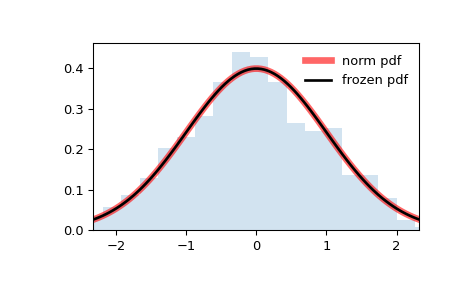

In [141]:
>>> from scipy.stats import norm

Let's go back to the `deals` dataframe. Since each deal was different, they generated different amounts of money, which is stored in the `amount` column. Let's determine the probability of selling different amounts, but first, let's see which distribution the `amount` column follows. 

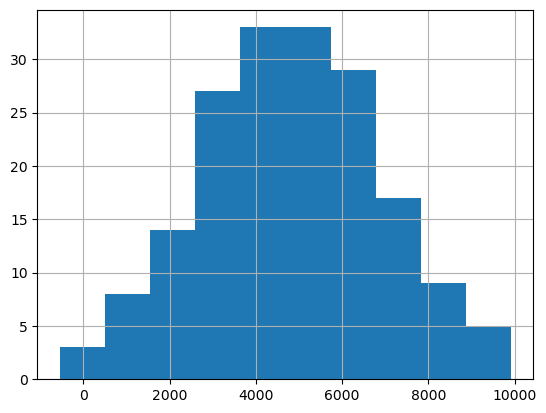

In [143]:
# Let's create a histogram of the amount column
deals['amount'].hist(bins=10)
plt.show()

In [150]:
# We define the mean and std
mean = deals['amount'].mean()
std = deals['amount'].std()

What's the probability of a deal closing with less than \$6500?

In [149]:
norm.cdf(6500, mean, std)

0.7939331610978384

What's the probability of a deal closing with more than \$1000?

In [152]:
1 - norm.cdf(1000, mean, std)

0.9679962803797577

What's the probability a deal worth between $1000 and 6500?

In [153]:
norm.cdf(6500, mean, std) - norm.cdf(1000, mean, std)

0.7619294414775961

Calculate the amount that 50% of deals will be less than

In [155]:
norm.ppf(0.50, mean, std)

4812.000337078652

We can now generate random values with the mean and std. Then, we can plot it to see its distribution.

In [158]:
sales = norm.rvs(mean, std, size= 50)

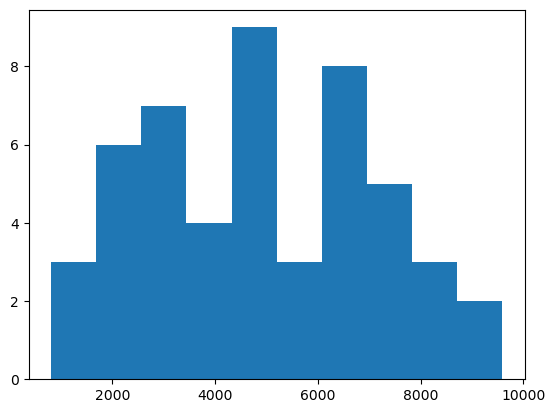

In [160]:
plt.hist(sales)
plt.show()

#  <a id='t3'> 3. Central Limit Theorem</a>

The Central Limit Theorem (CLT) is a fundamental concept in statistics that describes the behavior of sample means (or other sample statistics) when drawing multiple samples from a population, regardless of the shape of the population's distribution. The theorem states that as the sample size increases, the distribution of the sample means approaches a normal distribution, regardless of the shape of the original population distribution.

## <a id='3.1.'> 3.1 CLT </a>

To see more about other probability distributions available in `scipy.stats` you can go:
https://docs.scipy.org/doc/scipy/reference/stats.html